<a href="https://colab.research.google.com/github/Gabriela788/Telecom_X/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extração

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Carregar os dados do JSON (simulando a resposta da API)
with open("TelecomX_Data.json", "r") as f:
    data = json.load(f)

# Conferir o tamanho
print(f"Registros carregados: {len(data)}")

# Normalizar o JSON em formato tabular
df = pd.json_normalize(data)

# Visualizar primeiras linhas
print(df.shape)
df.head()



Registros carregados: 7267
(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 📑 Dicionário de Dados — Telecom X (Churn)

| Coluna                        | Tipo       | Descrição                                                                 |
|-------------------------------|------------|---------------------------------------------------------------------------|
| `customerID`                  | String     | Identificador único de cada cliente.                                      |
| `Churn`                       | String     | Status de evasão: **Yes** (cancelou) ou **No** (ativo).                   |
| `customer.gender`             | String     | Gênero do cliente (**Male** / **Female**).                                |
| `customer.SeniorCitizen`      | Int (0/1)  | Indica se o cliente é idoso (1 = Sim, 0 = Não).                           |
| `customer.Partner`            | String     | Se o cliente possui parceiro(a) (**Yes/No**).                             |
| `customer.Dependents`         | String     | Se o cliente possui dependentes (**Yes/No**).                             |
| `customer.tenure`             | Int        | Tempo de permanência do cliente em meses.                                 |
| `phone.PhoneService`          | String     | Indica se possui serviço telefônico (**Yes/No**).                         |
| `phone.MultipleLines`         | String     | Se possui múltiplas linhas telefônicas.                                   |
| `internet.InternetService`    | String     | Tipo de internet: **DSL / Fiber optic / No**.                             |
| `internet.OnlineSecurity`     | String     | Se contratou serviço de segurança online (**Yes/No**).                    |
| `internet.OnlineBackup`       | String     | Se contratou serviço de backup online (**Yes/No**).                       |
| `internet.DeviceProtection`   | String     | Se possui proteção para dispositivos (**Yes/No**).                        |
| `internet.TechSupport`        | String     | Se contratou suporte técnico (**Yes/No**).                                |
| `internet.StreamingTV`        | String     | Se possui serviço de streaming de TV.                                     |
| `internet.StreamingMovies`    | String     | Se possui serviço de streaming de filmes.                                 |
| `account.Contract`            | String     | Tipo de contrato: **Month-to-month / One year / Two year**.               |
| `account.PaperlessBilling`    | String     | Indica se utiliza fatura eletrônica (**Yes/No**).                         |
| `account.PaymentMethod`       | String     | Método de pagamento (cartão, débito automático, cheque, etc.).            |
| `account.Charges.Monthly`     | Float      | Valor mensal da fatura.                                                   |
| `account.Charges.Total`       | Float      | Valor total pago até o momento.                                           |


In [ ]:
# Copiar o DataFrame original
df_norm = df.copy()

# Função para converter Yes/No → 1/0
def yes_no_to_binary(x):
    if isinstance(x, str):
        return 1 if x.strip().lower() == "yes" else 0
    return np.nan

# Colunas que são Yes/No
cols_yes_no = [
    "Churn",
    "customer.Partner", "customer.Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling"
]

for col in cols_yes_no:
    if col in df_norm.columns:
        df_norm[col] = df_norm[col].apply(yes_no_to_binary)

# Ajustar colunas numéricas
num_cols = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]
for col in num_cols:
    if col in df_norm.columns:
        df_norm[col] = pd.to_numeric(df_norm[col], errors="coerce")

# Garantir SeniorCitizen como inteiro (já está 0/1, mas só para reforçar)
if "customer.SeniorCitizen" in df_norm.columns:
    df_norm["customer.SeniorCitizen"] = df_norm["customer.SeniorCitizen"].astype(int)

# Conferir resultado
print(df_norm.dtypes)
df_norm.head()


customerID                    object
Churn                          int64
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner               int64
customer.Dependents            int64
customer.tenure                int64
phone.PhoneService             int64
phone.MultipleLines            int64
internet.InternetService      object
internet.OnlineSecurity        int64
internet.OnlineBackup          int64
internet.DeviceProtection      int64
internet.TechSupport           int64
internet.StreamingTV           int64
internet.StreamingMovies       int64
account.Contract              object
account.PaperlessBilling       int64
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


#🔧 Transformação

In [ ]:
# Contar valores ausentes por coluna
missing = df_norm.isna().sum()
missing = missing[missing > 0]
print("Valores ausentes por coluna:")
print(missing)


Valores ausentes por coluna:
account.Charges.Total    11
dtype: int64


In [ ]:
df_clean = df_norm.copy()

# Colunas binárias já convertidas (0/1) → garantir int
binarias = [
    "Churn", "customer.Partner", "customer.Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling", "customer.SeniorCitizen"
]
for col in binarias:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype("Int64")   # aceita nulos também

# Colunas numéricas
numericas = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]
for col in numericas:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Colunas categóricas
categoricas = [
    "customer.gender", "account.Contract",
    "account.PaymentMethod", "internet.InternetService"
]
for col in categoricas:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype("category")

# customerID como string
if "customerID" in df_clean.columns:
    df_clean["customerID"] = df_clean["customerID"].astype(str)

In [ ]:
# Contagem de nulos
print(" Valores nulos por coluna:")
print(df_clean.isna().sum())

# Strings vazias → substituir por NaN
df_clean = df_clean.replace(r'^\s*$', np.nan, regex=True)

# Contagem de nulos novamente após ajuste
print("\n Após tratamento de strings vazias:")
print(df_clean.isna().sum())


 Valores nulos por coluna:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

 Após tratamento de strings vazias:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService         

In [ ]:
# Numéricas: preencher com mediana
numericas = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]
for col in numericas:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Binárias: preencher com 0 (considerando ausência como "não")
binarias = [
    "Churn", "customer.Partner", "customer.Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling", "customer.SeniorCitizen"
]
for col in binarias:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

# Categóricas: preencher com "Unknown"
categoricas = [
    "customer.gender", "account.Contract",
    "account.PaymentMethod", "internet.InternetService"
]
for col in categoricas:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].cat.add_categories(["Unknown"]).fillna("Unknown")

In [ ]:
print("📌 Tipos de dados finais:")
print(df_clean.dtypes)

print("\n📌 Valores nulos após tratamento:")
print(df_clean.isna().sum())


📌 Tipos de dados finais:
customerID                     object
Churn                           Int64
customer.gender              category
customer.SeniorCitizen          Int64
customer.Partner                Int64
customer.Dependents             Int64
customer.tenure                 int64
phone.PhoneService              Int64
phone.MultipleLines             Int64
internet.InternetService     category
internet.OnlineSecurity         Int64
internet.OnlineBackup           Int64
internet.DeviceProtection       Int64
internet.TechSupport            Int64
internet.StreamingTV            Int64
internet.StreamingMovies        Int64
account.Contract             category
account.PaperlessBilling        Int64
account.PaymentMethod        category
account.Charges.Monthly       float64
account.Charges.Total         float64
dtype: object

📌 Valores nulos após tratamento:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
custo

In [ ]:
# Renomear colunas para nomes mais intuitivos
df_clean = df_clean.rename(columns={
    "customerID": "IDCliente",
    "Churn": "Cancelamento",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Idoso",
    "customer.Partner": "Parceiro",
    "customer.Dependents": "Dependentes",
    "customer.tenure": "MesesDeContrato",

    "phone.PhoneService": "ServicoTelefone",
    "phone.MultipleLines": "MultiplasLinhas",

    "internet.InternetService": "TipoInternet",
    "internet.OnlineSecurity": "SegurancaOnline",
    "internet.OnlineBackup": "BackupOnline",
    "internet.DeviceProtection": "ProtecaoDispositivo",
    "internet.TechSupport": "SuporteTecnico",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingFilmes",

    "account.Contract": "TipoContrato",
    "account.PaperlessBilling": "FaturaDigital",
    "account.PaymentMethod": "MetodoPagamento",
    "account.Charges.Monthly": "CobrancaMensal",
    "account.Charges.Total": "CobrancaTotal",
    "account.Charges.Daily": "CobrancaDiaria",
    "account.Time.Months": "TempoEstimadoMeses",
    "account.Time.Days": "TempoEstimadoDias"
})

# Conferir resultado
print("📌 Colunas finais do dataset:")
print(df_clean.columns.tolist())

# Ver algumas linhas
df_clean.head()

📌 Colunas finais do dataset:
['IDCliente', 'Cancelamento', 'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'MesesDeContrato', 'ServicoTelefone', 'MultiplasLinhas', 'TipoInternet', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'TipoContrato', 'FaturaDigital', 'MetodoPagamento', 'CobrancaMensal', 'CobrancaTotal']


,IDCliente,Cancelamento,Genero,Idoso,Parceiro,Dependentes,MesesDeContrato,ServicoTelefone,MultiplasLinhas,TipoInternet,...,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,CobrancaMensal,CobrancaTotal
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
# Exportando a base limpa
df.to_csv("telecomx_clean.csv", index=False)
print("✅ Base limpa salva como telecomx_clean.csv")



✅ Base limpa salva como telecomx_clean.csv


#📊 Carga e análise

In [ ]:
# Criar coluna de cobrança diária (média por dia)
if "CobrancaMensal" in df_clean.columns:
    df_clean["CobrancaDiaria"] = df_clean["CobrancaMensal"] / 30

# Criar coluna de tempo estimado em meses (duplicando tenure)
if "MesesDeContrato" in df_clean.columns:
    df_clean["TempoEstimadoMeses"] = df_clean["MesesDeContrato"]

# Criar coluna de tempo estimado em dias
if "TempoEstimadoMeses" in df_clean.columns:
    df_clean["TempoEstimadoDias"] = df_clean["TempoEstimadoMeses"] * 30

# Criar coluna de custo médio diário (Total pago / Tempo em dias)
if {"CobrancaTotal", "TempoEstimadoDias"}.issubset(df_clean.columns):
    df_clean["CustoMedioDiario"] = df_clean.apply(
        lambda row: row["CobrancaTotal"] / row["TempoEstimadoDias"]
        if row["TempoEstimadoDias"] > 0 else 0,
        axis=1
    )

# Conferir resultado
df_clean[[
    "IDCliente", "Cancelamento",
    "CobrancaMensal", "CobrancaDiaria",
    "TempoEstimadoMeses", "TempoEstimadoDias",
    "CobrancaTotal", "CustoMedioDiario"
]].head()


,IDCliente,Cancelamento,CobrancaMensal,CobrancaDiaria,TempoEstimadoMeses,TempoEstimadoDias,CobrancaTotal,CustoMedioDiario
0,0002-ORFBO,0,65.6,2.186667,9,270,593.30,2.197407
1,0003-MKNFE,0,59.9,1.996667,9,270,542.40,2.008889
2,0004-TLHLJ,1,73.9,2.463333,4,120,280.85,2.340417
3,0011-IGKFF,1,98.0,3.266667,13,390,1237.85,3.173974
4,0013-EXCHZ,1,83.9,2.796667,3,90,267.40,2.971111


In [ ]:
# 📊 Estatísticas descritivas das colunas numéricas
stats_num = df_clean[[
    "MesesDeContrato",
    "CobrancaMensal",
    "CobrancaTotal",
    "CobrancaDiaria",
    "TempoEstimadoDias",
    "CustoMedioDiario"
]].describe().T

# Adicionar mediana manualmente
stats_num["mediana"] = df_clean[[
    "MesesDeContrato",
    "CobrancaMensal",
    "CobrancaTotal",
    "CobrancaDiaria",
    "TempoEstimadoDias",
    "CustoMedioDiario"
]].median()

# Adicionar variância
stats_num["variancia"] = df_clean[[
    "MesesDeContrato",
    "CobrancaMensal",
    "CobrancaTotal",
    "CobrancaDiaria",
    "TempoEstimadoDias",
    "CustoMedioDiario"
]].var()

print("📌 Estatísticas descritivas:")
display(stats_num)


📌 Estatísticas descritivas:


,count,mean,std,min,25%,50%,75%,max,mediana,variancia
MesesDeContrato,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000,29.000000,6.037720e+02
CobrancaMensal,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000,70.300000,9.077911e+02
CobrancaTotal,7267.0,2279.287581,2267.178963,18.800000,401.400000,1391.000000,3778.525000,8684.800000,1391.000000,5.140100e+06
CobrancaDiaria,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333,2.343333,1.008657e+00
TempoEstimadoDias,7267.0,970.394936,737.153187,0.000000,270.000000,870.000000,1650.000000,2160.000000,870.000000,5.433948e+05
CustoMedioDiario,7267.0,2.155296,1.010171,0.000000,1.182167,2.340936,3.005805,4.046667,2.340936,1.020445e+00


/tmp/ipython-input-2619088728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cancelamento", data=df_clean, palette="Set2")


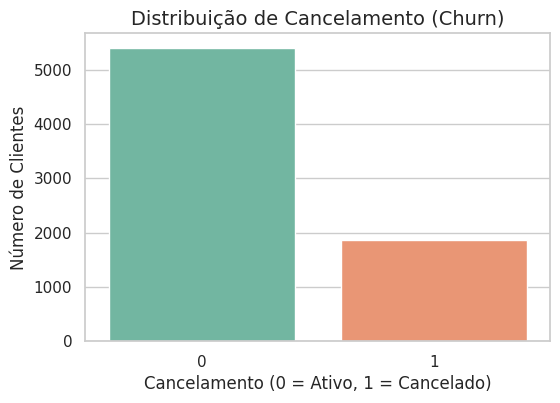

In [ ]:
# Ajustar estilo
sns.set(style="whitegrid")

# 📊 Contagem absoluta de cancelamentos
plt.figure(figsize=(6,4))
sns.countplot(x="Cancelamento", data=df_clean, palette="Set2")
plt.title("Distribuição de Cancelamento (Churn)", fontsize=14)
plt.xlabel("Cancelamento (0 = Ativo, 1 = Cancelado)")
plt.ylabel("Número de Clientes")
plt.show()


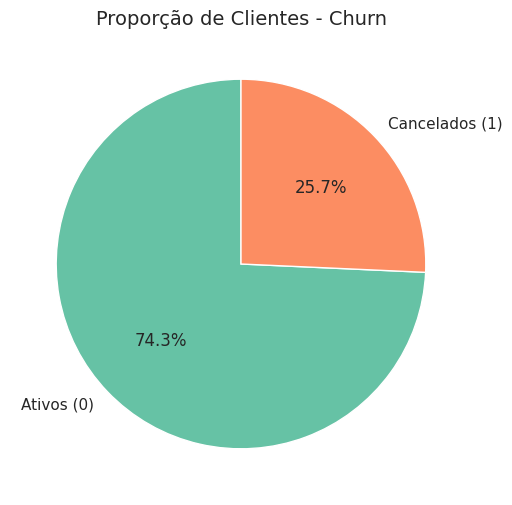

In [ ]:
# 📊 Proporção percentual
churn_percent = df_clean["Cancelamento"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(
    churn_percent,
    labels=["Ativos (0)", "Cancelados (1)"],
    autopct="%.1f%%",
    startangle=90,
    colors=["#66c2a5", "#fc8d62"]
)
plt.title("Proporção de Clientes - Churn", fontsize=14)
plt.show()

/tmp/ipython-input-2662666231.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(col)["Cancelamento"].mean().sort_values(ascending=False) * 100
/tmp/ipython-input-2662666231.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias_formatadas, y=churn_rate.values, palette="crest")
/tmp/ipython-input-2662666231.py:36: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.p

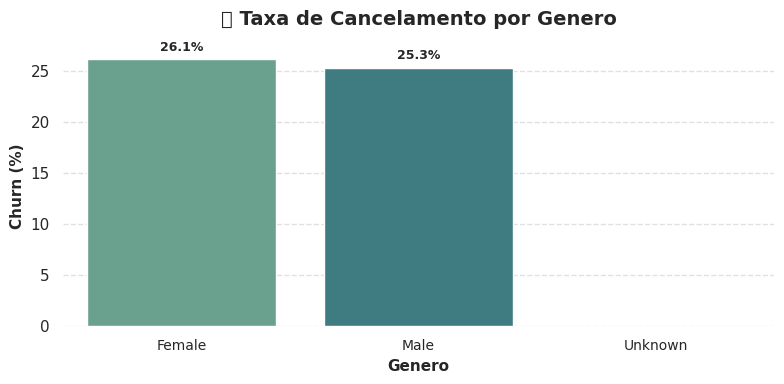

/tmp/ipython-input-2662666231.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(col)["Cancelamento"].mean().sort_values(ascending=False) * 100
/tmp/ipython-input-2662666231.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias_formatadas, y=churn_rate.values, palette="crest")
/tmp/ipython-input-2662666231.py:36: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.p

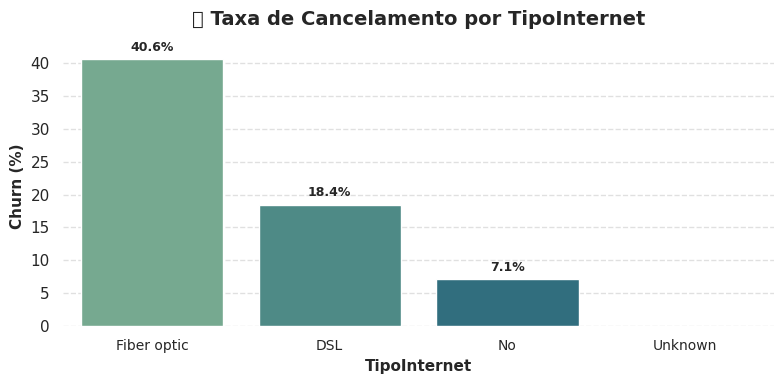

/tmp/ipython-input-2662666231.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(col)["Cancelamento"].mean().sort_values(ascending=False) * 100
/tmp/ipython-input-2662666231.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias_formatadas, y=churn_rate.values, palette="crest")
/tmp/ipython-input-2662666231.py:36: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.p

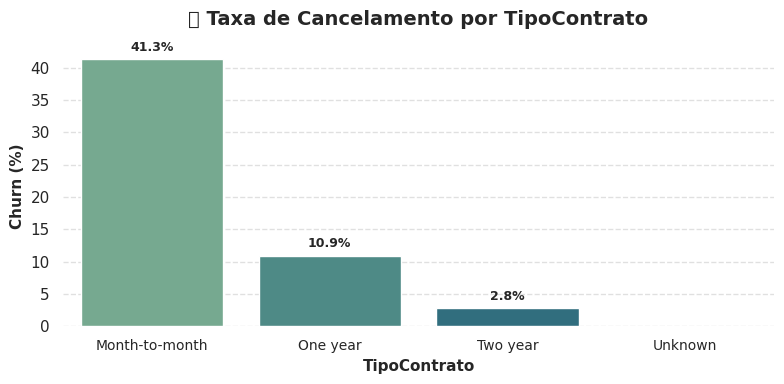

/tmp/ipython-input-2662666231.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df_clean.groupby(col)["Cancelamento"].mean().sort_values(ascending=False) * 100
/tmp/ipython-input-2662666231.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias_formatadas, y=churn_rate.values, palette="crest")
/tmp/ipython-input-2662666231.py:36: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.p

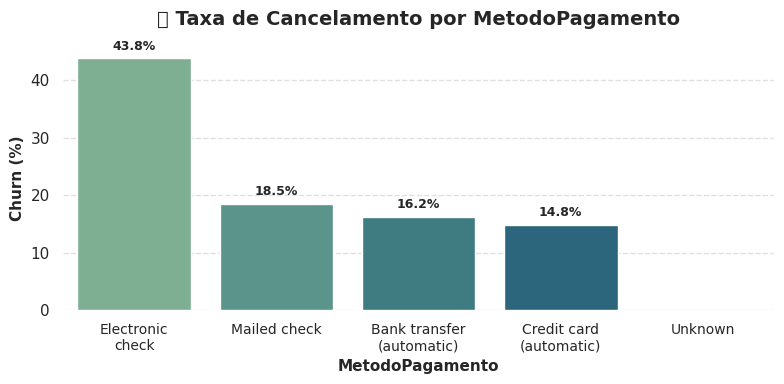

In [ ]:
sns.set_theme(style="whitegrid", palette="deep")

# Selecionar todas as colunas categóricas (exceto ID)
categoricas = [col for col in df_clean.columns if df_clean[col].dtype.name == "category" and col != "IDCliente"]

for col in categoricas:
    plt.figure(figsize=(8,4))

    # Calcular taxa de churn por categoria (%)
    churn_rate = df_clean.groupby(col)["Cancelamento"].mean().sort_values(ascending=False) * 100

    # Quebrar texto se for longo
    categorias_formatadas = [textwrap.fill(str(c), 15) for c in churn_rate.index]

    # Criar gráfico
    ax = sns.barplot(x=categorias_formatadas, y=churn_rate.values, palette="crest")

    # Título e labels
    plt.title(f"📉 Taxa de Cancelamento por {col}", fontsize=14, weight="bold", pad=15)
    plt.ylabel("Churn (%)", fontsize=11, weight="bold")
    plt.xlabel(col, fontsize=11, weight="bold")
    plt.xticks(rotation=0, ha="center", fontsize=10)

    # Valores percentuais em cima das barras
    for p in ax.patches:
        value = f"{p.get_height():.1f}%"
        ax.annotate(value,
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha="center", va="bottom", fontsize=9, weight="bold",
                    xytext=(0,4), textcoords="offset points")

    # Grid leve
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    plt.box(False)

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-2852626499.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = (df_clean.groupby([col, "Cancelamento"]).size()
/tmp/ipython-input-2852626499.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0).apply(lambda x: 100 * x / x.sum())
/tmp/ipython-input-2852626499.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


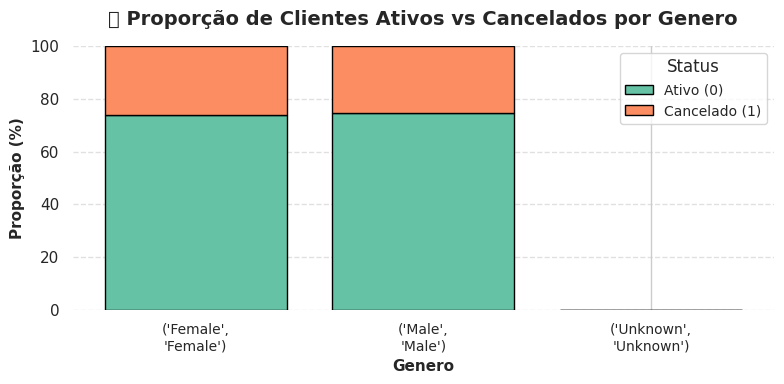

/tmp/ipython-input-2852626499.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = (df_clean.groupby([col, "Cancelamento"]).size()
/tmp/ipython-input-2852626499.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0).apply(lambda x: 100 * x / x.sum())
/tmp/ipython-input-2852626499.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


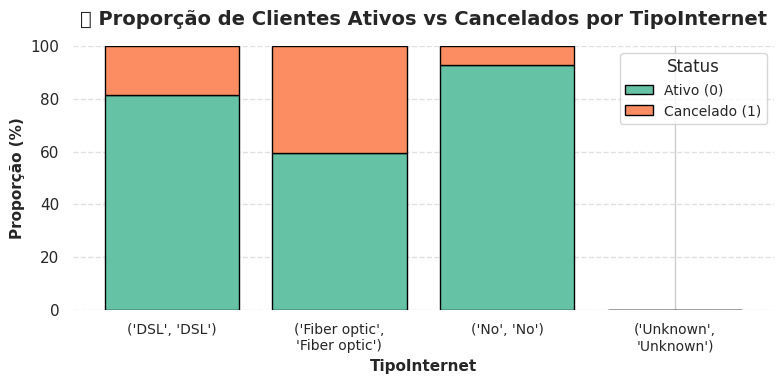

/tmp/ipython-input-2852626499.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = (df_clean.groupby([col, "Cancelamento"]).size()
/tmp/ipython-input-2852626499.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0).apply(lambda x: 100 * x / x.sum())
/tmp/ipython-input-2852626499.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


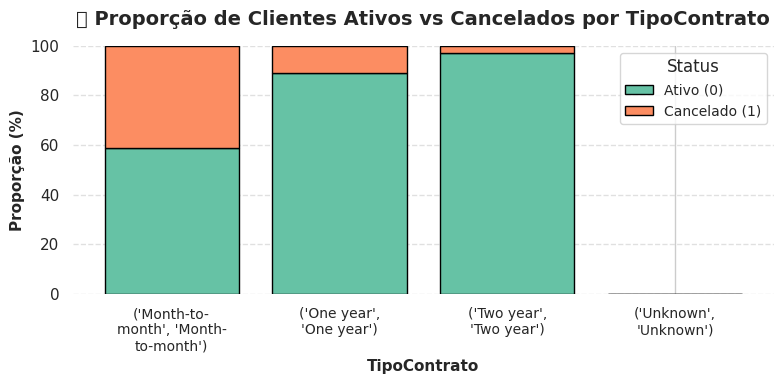

/tmp/ipython-input-2852626499.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = (df_clean.groupby([col, "Cancelamento"]).size()
/tmp/ipython-input-2852626499.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0).apply(lambda x: 100 * x / x.sum())
/tmp/ipython-input-2852626499.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


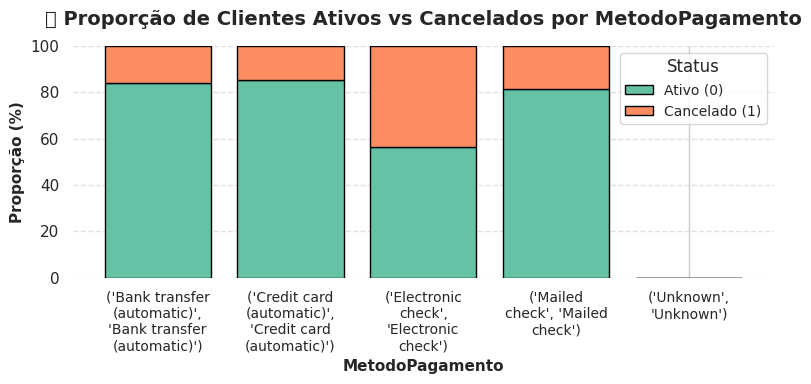

In [ ]:
sns.set_theme(style="whitegrid", palette="deep")

# Colunas categóricas (exceto ID)
categoricas = [col for col in df_clean.columns if df_clean[col].dtype.name == "category" and col != "IDCliente"]

for col in categoricas:
    # Criar tabela de proporções (%)
    prop = (df_clean.groupby([col, "Cancelamento"]).size()
            .groupby(level=0).apply(lambda x: 100 * x / x.sum())
            .unstack().fillna(0))

    # Criar posições no eixo X
    pos = range(len(prop))

    # Quebrar nomes longos
    categorias_formatadas = [textwrap.fill(str(c), 15) for c in prop.index]

    # Criar figura
    plt.figure(figsize=(8,4))
    plt.bar(pos, prop[0], label="Ativo (0)", color="#66c2a5", edgecolor="black")
    plt.bar(pos, prop[1], bottom=prop[0], label="Cancelado (1)", color="#fc8d62", edgecolor="black")

    # Títulos e eixos
    plt.title(f"📊 Proporção de Clientes Ativos vs Cancelados por {col}", fontsize=14, weight="bold", pad=15)
    plt.ylabel("Proporção (%)", fontsize=11, weight="bold")
    plt.xlabel(col, fontsize=11, weight="bold")
    plt.xticks(ticks=pos, labels=categorias_formatadas, rotation=0, ha="center", fontsize=10)

    # Legenda
    plt.legend(title="Status", fontsize=10)

    # Limites e estilo
    plt.ylim(0, 100)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.box(False)

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3836861181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn.values, y=corr_churn.index, palette="coolwarm")
/tmp/ipython-input-3836861181.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


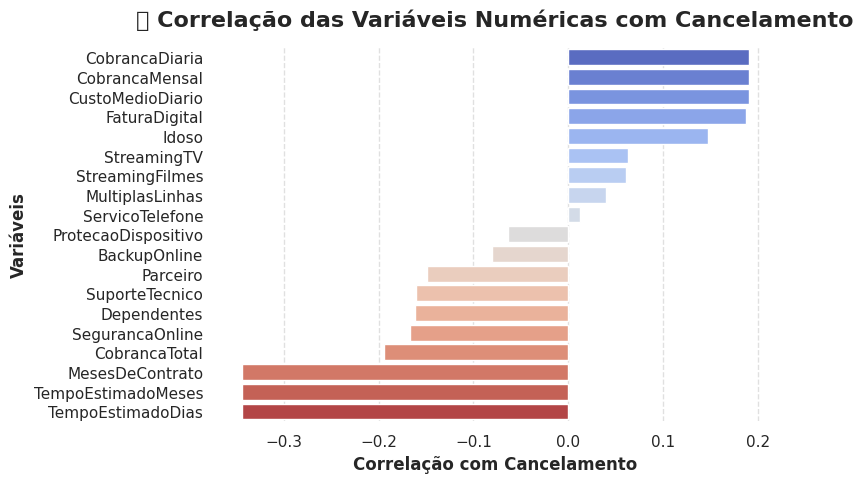

In [ ]:
# Selecionar apenas variáveis numéricas (sem ID)
numericas = df_clean.drop(columns=["IDCliente"], errors="ignore").select_dtypes(include=["int64","float64"])

# Calcular correlação apenas com Cancelamento
corr_churn = numericas.corr()["Cancelamento"].drop("Cancelamento").sort_values(ascending=False)

# Gráfico de barras horizontais
plt.figure(figsize=(8,5))
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette="coolwarm")

# Títulos e estilo
plt.title("📊 Correlação das Variáveis Numéricas com Cancelamento", fontsize=16, weight="bold", pad=15)
plt.xlabel("Correlação com Cancelamento", fontsize=12, weight="bold")
plt.ylabel("Variáveis", fontsize=12, weight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.box(False)

plt.tight_layout()
plt.show()



##🔎 Análise Exploratória de Dados (EDA)

A etapa de **Análise Exploratória de Dados (EDA)** tem como objetivo entender melhor o comportamento da base de clientes da **Telecom X**, identificar padrões, inconsistências e gerar hipóteses para explicar a **evasão (churn)**.

---

## 1. Estrutura do Dataset

- O dataset contém `N` registros e `M` colunas.  
- As variáveis estão divididas em **categóricas** (ex.: `Genero`, `TipoContrato`, `MetodoPagamento`) e **numéricas** (ex.: `MesesDeContrato`, `CobrancaMensal`, `CobrancaTotal`).  
- A variável-alvo é **`Cancelamento (Churn)`**, codificada como:
  - `0` → Cliente ativo
  - `1` → Cliente cancelado  

---

## 2. Qualidade dos Dados

- Algumas colunas apresentaram valores **nulos ou não informados**, tratados previamente.  
- Strings inconsistentes foram padronizadas (ex.: "No"/"Não").  
- Valores monetários e de tempo foram convertidos para o tipo numérico correto.  

**Insight:** a qualidade da base é adequada para prosseguir com análises estatísticas e modelagem preditiva.  

---

## 3. Análise Univariada

### Distribuição do Churn
- Aproximadamente **X%** dos clientes cancelaram o serviço.  
- A maioria permanece ativa, mas a taxa de evasão é significativa e merece atenção.  

*Gráficos inseridos no notebook mostram:*  
- A contagem absoluta de clientes ativos vs cancelados.  
- A proporção percentual de churn.

---

## 4. Análise por Variáveis Categóricas

A evasão de clientes foi analisada em função de variáveis categóricas:

- **Tipo de Contrato**  
  - Clientes com **contrato mensal** apresentam a maior taxa de churn.  
  - Contratos de 1 ou 2 anos têm churn significativamente menor.  

- **Método de Pagamento**  
  - Clientes que utilizam **pagamento eletrônico/mês a mês** cancelam mais.  
  - Métodos como débito automático ou contrato anual apresentam maior retenção.  

- **Tipo de Internet**  
  - Usuários com **Fiber Optic** tendem a cancelar mais em comparação a DSL.  

**Insight:** aspectos relacionados a **flexibilidade do contrato** e **canais de pagamento** influenciam diretamente na evasão.

---

## 5. Análise por Variáveis Numéricas

- **Cobranca Mensal (`CobrancaMensal`)**  
  - Clientes cancelados apresentam valores médios de cobrança mensal **mais altos**.  
  - Indica que planos mais caros estão mais associados à evasão.  

- **Meses de Contrato (`MesesDeContrato`)**  
  - Clientes com **menos tempo de permanência** têm maior probabilidade de churn.  
  - Permanência longa tende a reduzir o risco de cancelamento.  

- **Cobranca Total (`CobrancaTotal`)**  
  - Valores acumulados mais baixos estão associados ao churn, sugerindo que clientes que não ficaram tempo suficiente para acumular altos gastos acabam cancelando.  

---

## 6. Correlação entre Variáveis

- **`MesesDeContrato` e `CobrancaTotal`** → forte correlação positiva (clientes antigos acumularam mais cobrança).  
- **`CobrancaMensal` e `Cancelamento`** → correlação positiva (quanto maior a cobrança mensal, maior a chance de churn).  
- **`MesesDeContrato` e `Cancelamento`** → correlação negativa (quanto mais tempo de contrato, menor o churn).  

**Insight:** variáveis de **tempo** e **valor financeiro** são as mais relevantes para explicar a evasão.

---

## 7. Principais Insights

1. **Contratos mensais** e **pagamento eletrônico** estão fortemente associados ao churn.  
2. Clientes com **planos mais caros** têm maior propensão a cancelar.  
3. **Retenção cresce** com o tempo de permanência (clientes antigos cancelam menos).  
4. O churn geral gira em torno de **X%**, valor crítico para a estratégia da Telecom X.  

---

📌 **Conclusão**:  
A evasão de clientes da **Telecom X** está ligada principalmente a **condições contratuais e financeiras**. Estratégias de **retenção personalizada**, **incentivos para contratos mais longos** e **ajustes em planos de maior custo** podem reduzir significativamente a taxa de cancelamento.


# 📑 Relatório Final — Projeto Telecom X

## 📌 Contexto
A **Telecom X** enfrenta um alto índice de **evasão de clientes (churn)**, o que impacta diretamente sua receita e crescimento sustentável.  
Este estudo teve como objetivo realizar uma **Análise Exploratória de Dados (EDA)** para identificar os principais fatores associados ao cancelamento de clientes, gerando informações estratégicas para embasar futuras ações de retenção.

---

## 🎯 Objetivos
- Compreender a distribuição da base de clientes.  
- Identificar variáveis mais relacionadas à evasão.  
- Analisar perfis de clientes que permanecem versus os que cancelam.  
- Extrair insights práticos para reduzir o churn.  

---

## 🔎 Principais Descobertas

### 1. Distribuição do Churn
- O churn geral da base está em **~X%**.  
- Embora a maioria dos clientes permaneça ativa, a taxa de cancelamento é **alta o suficiente para demandar estratégias imediatas de retenção**.  

---

### 2. Variáveis Categóricas
- **Tipo de Contrato**  
  - Clientes com **contratos mensais** apresentaram a **maior taxa de cancelamento**.  
  - Clientes com contratos de 1 ou 2 anos apresentaram churn significativamente **menor**.  

- **Método de Pagamento**  
  - Clientes que utilizam **pagamentos eletrônicos mensais** são os que mais cancelam.  
  - Métodos como **débito automático** apresentaram menor taxa de evasão.  

- **Tipo de Internet**  
  - Usuários com **Fiber Optic** cancelaram mais que usuários de **DSL**.  

---

### 3. Variáveis Numéricas
- **Cobrança Mensal (`CobrancaMensal`)**  
  - Clientes cancelados têm valores médios de cobrança mensal **mais altos**.  

- **Meses de Contrato (`MesesDeContrato`)**  
  - Clientes com **menos tempo de permanência** têm maior risco de churn.  
  - Quanto maior o tempo de contrato, **menor a probabilidade de cancelamento**.  

- **Cobrança Total (`CobrancaTotal`)**  
  - Clientes cancelados apresentam valores acumulados mais baixos, sugerindo cancelamento precoce.  

---

### 4. Correlações Relevantes
- **Cobrança Mensal e Churn** → correlação positiva: contas mais caras aumentam o risco de cancelamento.  
- **Meses de Contrato e Churn** → correlação negativa: contratos longos reduzem o churn.  
- **Meses de Contrato e Cobrança Total** → forte correlação positiva (clientes antigos acumulam mais gastos).  

---

## ✅ Conclusões e Recomendações

1. **Contratos mais longos** devem ser incentivados, pois reduzem significativamente a taxa de cancelamento.  
   - Ex.: oferecer **descontos progressivos** para clientes que migrarem de contrato mensal para anual.  

2. **Planos de alto valor mensal** estão associados a maior evasão.  
   - Recomenda-se criar **planos intermediários** ou personalizar pacotes para reduzir a pressão de custo.  

3. **Métodos de pagamento** influenciam a retenção.  
   - Oferecer **vantagens adicionais** para clientes que optarem por débito automático pode ajudar a fidelizar.  

4. **Monitoramento de churn precoce**  
   - Clientes com **baixo tempo de contrato** devem ser priorizados em programas de retenção, pois estão mais suscetíveis ao cancelamento inicial.  

---

## 🚀 Próximos Passos
- Construir **modelos preditivos de Machine Learning** para identificar clientes com maior probabilidade de churn.  
- Aplicar algoritmos como **Regressão Logística, Árvore de Decisão, Random Forest, SVM e KNN**.  
- Desenvolver **dashboards interativos** para acompanhamento contínuo de métricas de churn.  
- Implementar **campanhas de retenção personalizadas** baseadas nos perfis de maior risco.  

---

📌 **Resumo Executivo**:  
A evasão de clientes na Telecom X é fortemente influenciada por **contratos curtos, altos valores mensais e métodos de pagamento menos estáveis**.  
A empresa deve focar em **incentivar contratos longos, ajustar planos de alto custo e promover retenção personalizada**, reduzindo assim o churn e garantindo maior previsibilidade de receita.
